In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset
df = pd.read_csv('Covid_GPT.csv')

In [3]:
# Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
      Tanggal Nama_Negara  Jumlah_Kasus_Baru  Jumlah_Kematian_Baru  \
0  2024-01-01   Indonesia               1000                    25   
1  2024-01-01         USA              20000                   500   
2  2024-01-01      Brazil              15000                   300   
3  2024-01-02   Indonesia               1200                    30   
4  2024-01-02         USA              25000                   600   

   Jumlah_Sembuh_Baru  Total_Kasus  Total_Kematian  Total_Sembuh  
0                 800      1000000           30000        950000  
1               15000     50000000         1000000      48000000  
2               12000     25000000          700000      24000000  
3                 850      1001200           30030        950850  
4               20000     50025000         1000600      48020000  


In [4]:
# Informasi umum tentang dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Tanggal               6 non-null      object
 1   Nama_Negara           6 non-null      object
 2   Jumlah_Kasus_Baru     6 non-null      int64 
 3   Jumlah_Kematian_Baru  6 non-null      int64 
 4   Jumlah_Sembuh_Baru    6 non-null      int64 
 5   Total_Kasus           6 non-null      int64 
 6   Total_Kematian        6 non-null      int64 
 7   Total_Sembuh          6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes
None


In [5]:
# Statistik deskriptif dari dataset
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))


Statistik Deskriptif:
           Tanggal Nama_Negara  Jumlah_Kasus_Baru  Jumlah_Kematian_Baru  \
count            6           6           6.000000              6.000000   
unique           2           3                NaN                   NaN   
top     2024-01-01   Indonesia                NaN                   NaN   
freq             3           2                NaN                   NaN   
mean           NaN         NaN       13033.333333            300.833333   
std            NaN         NaN        9891.747402            237.074180   
min            NaN         NaN        1000.000000             25.000000   
25%            NaN         NaN        4650.000000             97.500000   
50%            NaN         NaN       15500.000000            325.000000   
75%            NaN         NaN       19000.000000            462.500000   
max            NaN         NaN       25000.000000            600.000000   

        Jumlah_Sembuh_Baru   Total_Kasus  Total_Kematian  Total_Sembuh  
cou

In [6]:
# Menampilkan negara yang terdapat dalam dataset
print("\nNegara dalam Dataset:")
print(df['Nama_Negara'].unique())


Negara dalam Dataset:
['Indonesia' 'USA' 'Brazil']


In [7]:
# Menghitung total kasus per negara
total_kasus_per_negara = df.groupby('Nama_Negara')['Total_Kasus'].max()
print("\nTotal Kasus per Negara:")
print(total_kasus_per_negara)


Total Kasus per Negara:
Nama_Negara
Brazil       25016000
Indonesia     1001200
USA          50025000
Name: Total_Kasus, dtype: int64


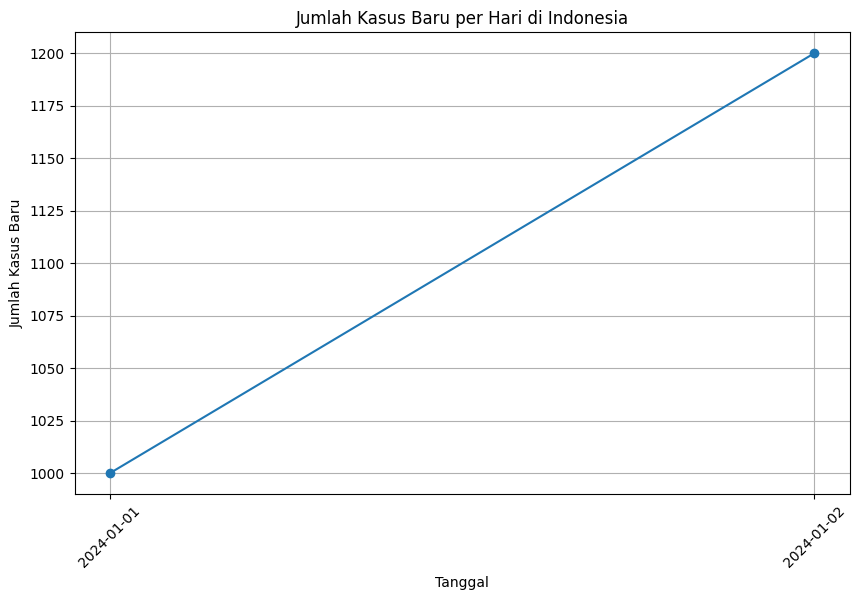

In [8]:
# Visualisasi jumlah kasus baru per hari di Indonesia
indonesia_df = df[df['Nama_Negara'] == 'Indonesia']
plt.figure(figsize=(10, 6))
plt.plot(indonesia_df['Tanggal'], indonesia_df['Jumlah_Kasus_Baru'], marker='o')
plt.title('Jumlah Kasus Baru per Hari di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

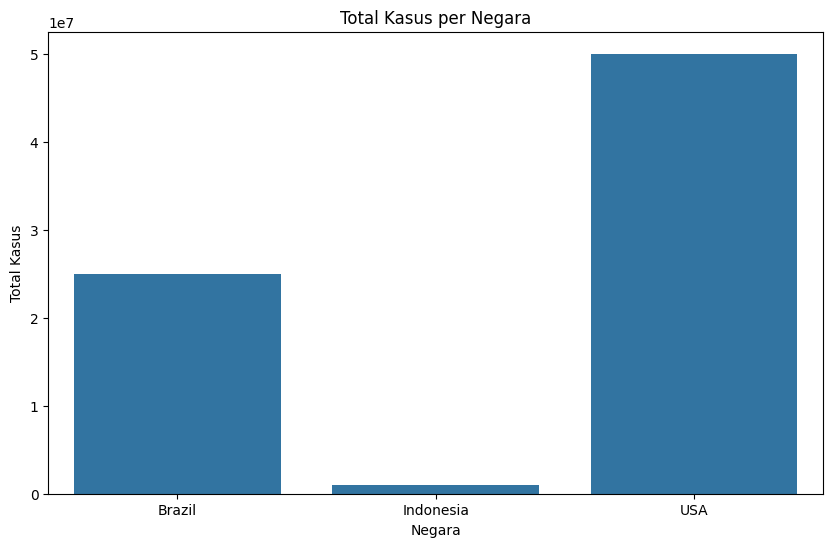

In [9]:
# Visualisasi perbandingan total kasus antar negara
plt.figure(figsize=(10, 6))
sns.barplot(x=total_kasus_per_negara.index, y=total_kasus_per_negara.values)
plt.title('Total Kasus per Negara')
plt.xlabel('Negara')
plt.ylabel('Total Kasus')
plt.show()

In [10]:
# Menghitung rasio kematian per negara
df['Rasio_Kematian'] = df['Total_Kematian'] / df['Total_Kasus'] * 100
rasio_kematian_per_negara = df.groupby('Nama_Negara')['Rasio_Kematian'].max()
print("\nRasio Kematian per Negara (%):")
print(rasio_kematian_per_negara)


Rasio Kematian per Negara (%):
Nama_Negara
Brazil       2.8000
Indonesia    3.0000
USA          2.0002
Name: Rasio_Kematian, dtype: float64


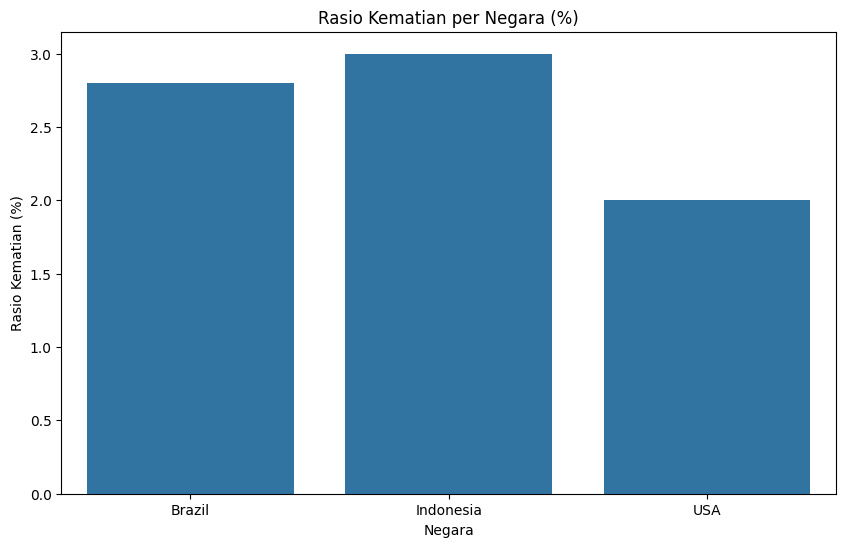

In [11]:
# Visualisasi rasio kematian per negara
plt.figure(figsize=(10, 6))
sns.barplot(x=rasio_kematian_per_negara.index, y=rasio_kematian_per_negara.values)
plt.title('Rasio Kematian per Negara (%)')
plt.xlabel('Negara')
plt.ylabel('Rasio Kematian (%)')
plt.show()